# Chapter 9: Image Processing

<div id="toc"></div>

## 9.1 Two-Dimensional Data

## 9.2 Reading, Writing, and Displaying Images

### 9.2.1 Reading Images from File

In [1]:
from PIL import Image

In [3]:
from pylab import *
figure()
gca().add_patch(Circle((0, 0), 1))
axis('off')
axis('scaled')
savefig('images/circle.png')

In [4]:
im = Image.open('images/circle.png')

### 9.2.2 Image Attributes

In [5]:
im.size

(432, 288)

In [6]:
im.info

{'dpi': (72, 72)}

In [7]:
im.mode

'RGBA'

In [8]:
im.format

'PNG'

In [9]:
im.filename

'images/circle.png'

* Example: Image Catalog

In [10]:
from PIL import Image
import os, csv
def image_catalog(srchpath):
    """Creates a catalog file named srchpath.cat.csv."""
    # the CSV header
    catalog = [['Filename', 'Pathname', 'Format', 'Size', 'Resolution' ]]
    
    # walk directory tree
    for root, dirs, files in os.walk(srchpath):
        for file in files:
            pathname = os.path.join(root, file)
            try:
                img = Image.open(pathname)
                filesize = os.path.getsize(pathname)
                catalog.append([file, pathname, img.format,
                                img.size, img.info])
            except IOError: # not an image
                pass
    # create the clean catalog
    f = open(srchpath.rstrip('/')+'.cat.csv', 'w', newline='')
    csv.writer(f).writerows(catalog)
    f.close()

### 9.2.3 Displaying Images

In [11]:
Image.open('images/circle.png').show()

### 9.2.4 Converting File Formats

In [12]:
im = Image.open('images/circle.png')
im.save('images/circle.jpg')
import os
os.listdir('images')

['circle.jpg',
 'circle.png',
 'mandelbrot_200_400.png',
 'newton_z4s_030_800_005.png']

In [13]:
from PIL import Image
from os.path import splitext
def ConvertToJpeg(filename):
    """Convert an image file to a Jpeg file."""
    jpegname = splitext(filename)[0]+'.jpg'
    Image.open(filename).save(jpegname)

In [15]:
im = Image.open('images/circle.png')
im.save('images/circle', format='Jpeg')
import os
[fn for fn in os.listdir('images') if fn.startswith('circle')]

['circle', 'circle.jpg', 'circle.png']

http://pillow.readthedocs.org/en/latest/reference/index.html

* Example: A Function to Convert All Images in a Directory to JPEG Format

In [16]:
import os, csv
from PIL import Image
def ConvertDirToJpeg(srchdir):
    """Converts all images in a directory to a jpeg file."""
    # walk directory tree
    for root, dirs, files in os.walk(srchdir):
        for file in files:
            # pathname holds the image filename
            pathname = os.path.join(root, file)
            try:
                # convert the file to a Jpeg file
                img = Image.open(pathname)
                jpegname = os.path.splitext(pathname)[0]+'.jpg'
                if os.path.exists(jpegname):
                    print("Did not create %s; file already exists." % jpegname)
                else:
                    img.save(jpegname)
                    print("Created file ", jpegname)
            except IOError: # oops, not an image
                pass

## 9.3 Image Manipulation

### 9.3.1 Creating New Images

| Mode   | Description   
|---|---|
| '1'    | 1 bit per pixel; useful for black-and-white images. 
| 'L'    | 1 byte per pixel (values from 0 to 255), black and white; useful for working with a one color band (see a discussion about color later in the chapter). 
| 'RGB'  | Red, green, and blue, 1 byte per color, also known as true color. RGB is common when the image background is black, such as on a screen monitor.   
| 'RGBA' | Red, green, blue, and a transparency mask, 1 byte per color; common in several file formats, including PNG.     
| 'CMYK' | Cyan, magenta, yellow, and black, 1 byte per color. CMYK is common in print.     


In [17]:
from PIL import Image
Image.MODES

['1', 'CMYK', 'F', 'HSV', 'I', 'L', 'LAB', 'P', 'RGB', 'RGBA', 'RGBX', 'YCbCr']

http://pillow.readthedocs.org/en/latest/handbook/concepts.html

In [19]:
im1 = Image.new('L', (800, 600)) # black, one-band image
im2 = Image.new('CMYK', (800, 600), (0, 255, 0, 0)) # magenta image
im3 = Image.new('RGB', (800, 600), (255, 0, 0)) # red image

In [20]:
im1.show()

In [21]:
im2.show()

In [22]:
im3.show()

### 9.3.2 Copy and Paste

* Example: Fractal Collage

In [26]:
from PIL import Image
from cmath import *
def fractal(delta=0.000001, res=800, iters=30):
    """Creates a z**4+1=0 fractal using the Newton-Raphson method."""
    # create an image to draw on, paint it black
    img = Image.new("RGB", (res, res), (0, 0, 0))
    # these are the solutions to the equation z**4+1=0 (Euler's formula)
    solutions = [cos((2*n+1)*pi/4)+1j*sin((2*n+1)*pi/4) for n in range(4)]
    colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 1, 0)]
    for re in range(0, res):
        for im in range(0, res):
            z = (re+1j*im)/res
            for i in range(iters):
                try:
                    z -= (z**4+1)/(4*z**3)
                except ZeroDivisionError:
                    # possibly divide by zero exception
                    continue
                if(abs(z**4+1) < delta):
                    break
                    
            # color depth is a function of the number of iterations
            color_depth = int((iters-i)*255.0/iters)
            
            # find to which solution this guess converged to
            err = [abs(z-root) for root in solutions]
            distances = zip(err, range(len(colors)))
            
            # select the color associated with the solution
            color = [i*color_depth for i in colors[min(distances)[1]]]
            img.putpixel((re, im), tuple(color))
            
    return img

In [30]:
from PIL import Image, ImageOps
# import the fractal function, from fractal.py file
from fractal import fractal
fsize = 200 # small fractal image width and height
nx = 3 # number of images, width
ny = 3 # number of images, height
collage = Image.new("RGB", (fsize*nx, fsize*ny))

for i in range(ny):
    for j in range(nx):
        im = fractal(0.000001, fsize, i*nx+j+1)
        print("Processing image %d of %d" % (i*nx+j+1, nx*ny))
        collage.paste(im, (fsize*j, fsize*i))
collage.save('images/collage.png')

Processing image 1 of 9
Processing image 2 of 9
Processing image 3 of 9
Processing image 4 of 9
Processing image 5 of 9
Processing image 6 of 9
Processing image 7 of 9
Processing image 8 of 9
Processing image 9 of 9


### 9.3.3 Crop and Resize

In [31]:
img = Image.open('images/collage.png')
img.size

(600, 600)

In [32]:
cropped_img = img.crop((0, 0, 400, 400))
cropped_img.size

(400, 400)

In [33]:
cropped_img.show()

In [34]:
img = Image.open('images/collage.png')
img.size

(600, 600)

In [35]:
resized_img = img.resize((400, 400))
resized_img.show()
resized_img.size

(400, 400)

In [36]:
img.thumbnail((400, 400))
img.size

(400, 400)

http://pillow.readthedocs.org/en/latest/handbook/concepts.html 

In [37]:
img.thumbnail((400, 400), Image.ANTIALIAS)

### 9.3.4 Rotate

In [38]:
img = Image.new('RGB', (200, 300), (0, 255, 255))
img30 = img.rotate(30)
img30.show()
img30.size

(200, 300)

In [39]:
img30e = img.rotate(30, expand=True)
img30e.show()
img30e.size

(324, 360)

## 9.4 Image Annotation

### 9.4.1 Annotating with Geometrical Shapes

In [40]:
from PIL import Image, ImageDraw
img = Image.new('RGB', (200, 300), (0, 0, 255))
draw = ImageDraw.Draw(img)

In [41]:
draw.line((100, 100, 200, 200))
img.show()

In [ ]:
draw = ImageDraw.Draw(Image) .

| Function |
|---|
| arc(xybox, start, end) |
| chord(xybox, start, end) |
| ellipse(xybox) |
| line(xyseq) |
| point(xy) |
| polygon(xyseq) |
| rectangle(xybox) |

### 9.4.2 Text Annotations

In [42]:
from PIL import Image, ImageDraw
img = Image.new('L', (160, 160), 255)
draw = ImageDraw.Draw(img)
draw.ellipse((0, 0, 160, 160), fill=128)
draw.text((80, 80), 'A long string')
img.show()

In [43]:
from PIL import Image, ImageDraw
img = Image.new('L', (160, 160), 255)
draw = ImageDraw.Draw(img)
draw.ellipse((0, 0, 160, 160), fill=128)
s = 'A long string'
width, height = draw.textsize(s)

In [44]:
width, height

(78, 11)

In [46]:
type(width)

int

In [ ]:
draw.text((80–width/2, 80–height/2), s)
img.show()

* Fonts

http://www.gnu.org/software/freefont/

In [51]:
from matplotlib import font_manager
from PIL import Image, ImageDraw, ImageFont
img = Image.new('L', (250, 100), 255)
draw = ImageDraw.Draw(img)
font_str = font_manager.findfont('Vera')
font_str
ttf = ImageFont.truetype(font_str, 54)
s = 'ABCabc'
(w, h) = draw.textsize(s, font=ttf)
draw.text(((250-w)/2, (100-h)/2), s, font=ttf)
img.show()

C:\Anaconda36\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Vera'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


* Example: Thumbnail Index Image

In [55]:
import os
from PIL import Image, ImageDraw

def thumbnail_index(dirpath):
    """Create a thumbnail index from images in dirpath."""
    num_images = 5
    thumb_size = (128, 96)
    cat_size = (num_images*thumb_size[0], num_images*thumb_size[1])
    fn_index = 0 # filename index
    img_index = 0 # image index
    # go through all the pictures in a directory
    
    for file in os.listdir(dirpath):
        # get the pathname for the file
        pathname = os.path.join(dirpath, file)
        try: # is this an image file?
            # open the image file
            img = Image.open(pathname)
        except IOError:
            print(file, "is not an image file")
            continue
            
        # create a thumbnail
        img.thumbnail((thumb_size), Image.ANTIALIAS)
        draw = ImageDraw.Draw(img)
        draw.text((2, 2), file)
        
        # do we need to create a new catalog image?
        if img_index == 0:
            thumbs_img = Image.new('RGB', cat_size)
        
        # calculate the location for this image
        x = img_index % num_images
        y = img_index // num_images
        
        # paste the thumbnail
        thumbs_img.paste(img, (x*thumb_size[0], y*thumb_size[1]))
        
        # increment the image index
        img_index += 1
        
        # have we reached the end of the catalog image?
        if img_index==num_images**2:
            img_index = 0
            thumbs_img.save('%s-%03d.cat.jpg' % (dirpath, fn_index))
            fn_index += 1
            
    # save the last catalog file
    if img_index:
        thumbs_img.save('%s-%03d.cat.jpg' % (dirpath, fn_index))

## 9.5 Image Processing

http://www.gimp.org

### 9.5.1 Matrix Representation and Colors

In [56]:
from PIL import Image
im = Image.open('images/circle.png')
im.mode

'RGBA'

In [57]:
R, G, B, A = im.split()
R.mode, G.mode, B.mode, A.mode

('L', 'L', 'L', 'L')

In [58]:
from pylab import *
data = array(R.getdata())

In [59]:
type(data)
data.size

124416

In [60]:
data.shape

(124416,)

In [61]:
im.size

(432, 288)

In [63]:
data = data.reshape(im.size)
data.size # size should be the same

124416

In [64]:
data.shape # reshaped as a matrix

(432, 288)

In [65]:
from pylab import *
from PIL import Image
im = Image.open('images/circle.png')
im.mode

'RGBA'

In [ ]:
R, G, B, A = im.split()
data = array(R.getdata()).reshape(im.size)
(w, h) = data.shape
data[w/2-100:w/2+100, :] = 255*ones((200, h))
R.putdata(data.reshape(h*w))
new_img = Image.merge('RGB', (R, G, B))
new_img.show()

### 9.5.2 Reading an Image to a NumPy Array

In [69]:
from pylab import *
data = imread('images/circle.png')
data.shape

(288, 432, 4)

In [70]:
data.size

497664

In [71]:
data.max()

1.0

In [72]:
data.min()

0.12156863

In [73]:
imshow(data)

In [74]:
axis('off')

(-1.1000000000000001,
 1.1000000000000001,
 -1.1000000000000001,
 1.1000000000000001)

In [75]:
data[..., :3] = 1 - data[..., :3]
imshow(data)
imsave('images/inverted_circle.png', data)

### 9.5.3 Example: Counting Objects (Five Parts

* Part 1: Twinkle, Twinkle, Little Star

In [77]:
# %load 0053-7-src-Ch09/src/star_patch.py
# create a star patch object
from pylab import *

def star(R, x0, y0, color='w', N=5, thin = 0.5):
    """Returns an N-pointed star of size R at (x0, y0) (matplotlib patch)."""

    polystar = zeros((2*N, 2))
    for i in range(2*N):
        angle = i*pi/N
        r = R*(1-thin*(i%2))
        polystar[i] = [r*cos(angle)+x0, r*sin(angle)+y0]
    return Polygon(polystar, fc=color, ec=color)

    
def another_star(R, x0, y0, color='w', N=5, thin = 0.5):
    """Returns an N-pointed star of size R at (x0, y0) (matplotlib patch)."""

    a = arange(0, 2*pi, 2*pi/N)
    r = (1-thin)*R
    polystar = array(list(zip(R*cos(a)+x0, R*sin(a)+y0, \
        r*cos(a+pi/N)+x0, r*sin(a+pi/N)+y0)))
    return Polygon(polystar.reshape(N*2, 2), fc=color, ec=color)


> USING a LISt COMpreheNSION

In [78]:
def another_star(R, x0, y0, color='w', N=5, thin = 0.5):
    """Returns an N-pointed star of size R at (x0, y0)."""
    a = arange(0, 2*pi, 2*pi/N)
    r = (1-thin)*R
    polystar = array(list(zip(R*cos(a)+x0, R*sin(a)+y0, \
                              r*cos(a+pi/N)+x0, r*sin(a+pi/N)+y0)))
    return Polygon(polystar.reshape(N*2, 2), fc=color, ec=color)

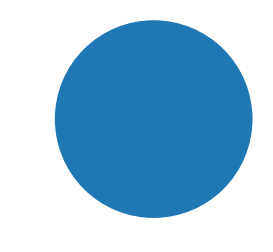

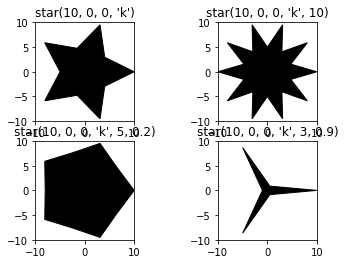

In [80]:
# show some star examples
from pylab import *
from star_patch import star
examples=[
    "star(10, 0, 0, 'k')",
    "star(10, 0, 0, 'k', 10)",
    "star(10, 0, 0, 'k', 5, 0.2)",
    "star(10, 0, 0, 'k', 3, 0.9)" ]

for i, example in enumerate(examples):
    subplot(2, 2, i+1)
    exec("new_star="+example)
    gca().add_patch(new_star)
    title(example)
    axis('scaled')
    axis([-10, 10, -10, 10])
show()

* Part 2: The Sky at Night

In [83]:
# %load 0053-7-src-Ch09/src/nightsky.py
# create a fictitious night sky
from pylab import *
from random import randrange as rr
from star_patch import star

# parameters for the simulated night sky image
img_size  = 800
num_stars = 25

# star parameters: number of pointy edges and radius
min_num_points  = 5
max_num_points  = 11
min_star_radius = 2
max_star_radius = 10

# star parameter 'thinness' is on a scale of 1 to 10
min_thin = 5
max_thin = 9

# draw the night sky
figure(facecolor='k')
cur_axes = gca()

# patch stars
for i in range(num_stars):
    new_star = star(rr(min_star_radius, max_star_radius), 
        rr(0, img_size) , rr(0, img_size), 'w', \
        rr(min_num_points, max_num_points), \
        rr(min_thin, max_thin)/10.0)
    cur_axes.add_patch(new_star)

# modify axis behaviour
axis([0, img_size, 0, img_size])
axis('scaled')
axis('off')

# save the figure without the extra margins
savefig('images/nightsky', facecolor='k', edgecolor='k')

* Part 3: Flood Fill and Recursion

In [85]:
# %load 0053-7-src-Ch09/src/flood_fill.py
from numpy import *
from sys import getrecursionlimit

def flood_fill(x, y, m, total):
    """A function to flood fill an image (matrix)."""

    if total > getrecursionlimit():
        return total
        
    # nothing to fill
    if m[x, y] != 1.0:
        return total
        
    m[x, y] = 0.5
    if(x-1 >= 0): 
        total = flood_fill(x-1, y, m, total+1)
    if(x+1 <= m.shape[0]-1): 
        total = flood_fill(x+1, y, m, total+1)
    if(y-1 >= 0): 
        total = flood_fill(x, y-1, m, total+1)
    if(y+1 <= m.shape[1]-1): 
        total = flood_fill(x, y+1, m, total+1)
    return total+1


* Part 4: Counting Objects

In [90]:
from pylab import *
from PIL import Image
from sys import getrecursionlimit
from flood_fill import flood_fill

# read the image, and retrieve the Red band
data = imread('images/nightsky.png')[..., 0]
rows, cols = data.shape
# set all values that are nonzero to 1.0
# (could be values due to antialiasing)
data[nonzero(data)] = 1.0
# count the stars
count, recursion_limit_reached = 0, 0
for i in range(rows):
    for j in range(cols):
        tot = flood_fill(i, j, data, 0)
        if tot > getrecursionlimit():
            recursion_limit_reached += 1
        elif tot > 0:
            count+=1
if recursion_limit_reached:
    print("Recursion limit reached %d times" % recursion_limit_reached)
print("I counted %d stars!" % count)
imshow(data)

I counted 25 stars!


* Part 5: Optimizing the Algorithm

### 9.5.4 Image Arithmetic

In [1]:
# display an image and its inverse
from PIL import Image, ImageChops
im = Image.open('images/nightsky.png')
new_img = Image.new('RGB', (im.size[0]*2, im.size[1]))
new_img.paste(im, (0, 0))
new_img.paste(ImageChops.invert(im), (im.size[0], 0))
new_img.show()

| Function |
|---|
| add(img1, img2, scale=1.0, offset=0) |
| constant(img1, value) |
| darker(img1, img2) |
| difference(img1, img2) |
| lighter(img1, img2) |
| subtract(img1, img2, |
| scale=1.0, offset=0) |

http://pillow.readthedocs.org/en/latest/reference/ImageChops.html

In [4]:
from PIL import Image, ImageDraw, ImageFont, ImageChops
from matplotlib import font_manager
# read the images
img1 = Image.open('images/nightsky1.png')
img2 = Image.open('images/nightsky2.png')

# create a new image, made of the lighter of the two
img3 = ImageChops.lighter(img1, img2)

# create a collage of three images
width, height = img1.size
delta = 10
img = Image.new('RGB', (width*2+delta, height*2+delta), (255, 255, 255))
img.paste(img1, (0, 0))
img.paste(img2, (width+delta, 0))
img.paste(img3, ((width+delta)//2, height+delta))
# annotate the images with text
font_str = font_manager.findfont('Vera')
ttf = ImageFont.truetype(font_str, 54)
draw = ImageDraw.Draw(img)
draw.text((delta, delta), 'Night Sky (1)', fill='white', font=ttf)
draw.text((delta*2+width, delta), 'Night Sky (2)', fill='white', font=ttf)
draw.text(((width+delta)//2+delta, height+delta*2), \
          'Combined', fill='white', font=ttf)
# display the final image
img.show()

C:\Anaconda36\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Vera'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


## 9.6 Image Filtering

In [5]:
from PIL import Image, ImageChops, ImageFilter
img = Image.open('images/nightsky.png')
inv_img = ImageChops.invert(img)
filt_img = inv_img.filter(ImageFilter.MinFilter(15))
filt_img.show()

In [6]:
from PIL import ImageFilter
[filt for filt in dir(ImageFilter) if filt.isupper()]

['BLUR',
 'CONTOUR',
 'DETAIL',
 'EDGE_ENHANCE',
 'EDGE_ENHANCE_MORE',
 'EMBOSS',
 'FIND_EDGES',
 'SHARPEN',
 'SMOOTH',
 'SMOOTH_MORE']

In [8]:
new_img = img.filter(ImageFilter.CONTOUR)

| Function |
|---|
| MaxFilter(size=3) |
| MedianFilter(size=3) |
| MinFilter(size=3) |
| ModeFilter(size=3) |

## 9.7 Making Movies

### 9.7.1 Splitting Movies

http://mplayerhq.hu

### 9.7.2 Creating Movies from Images

http://www.mplayerhq.hu/DOCS/HTML/en/menc-feat-enc-images.html

### 9.7.3 Example: A Fractal Movie

In [ ]:
from PIL import Image, ImageOps
import os
# creates an image of the Mandelbrot set
res = 400
for iters in range(50):
    img = Image.new("L", (res, res), 255)
    for im in range(res):
        for re in range(res):
            z = 0
            # a scaling to show the "interesting" part of
            # the Mandelbrot fractal
            c = (re*2/res-1.5)+1j*(im*2/res-1)
            for k in range(iters):
            z = z**2+c
            if abs(z)>2:
                img.putpixel((re, im), 255-k*255/iters)
                break
                
# create a uniform distribution of gray levels
img = ImageOps.equalize(img)

# save to file
img.save('images/mandelbrot_%04d.png' % iters, dpi=(150,150))
last_path = os.getcwd()

# handle Linux/Mac and Windows properly
os.chdir('images')

if os.sys.platform.startswith('win'):
    mee = 'c:/mplayer/mencoder '
    mep = 'c:/mplayer/mplayer '
else:    
    mee = 'mplayer '
    mep = 'c:/mplayer '

# encode the movie
os.system(mee+'mf://mandelbrot*.png -mf type=png -ovc lavc -o mandelbrot.avi')

# play the movie
os.system(mep+'mandelbrot.avi')
os.chdir(last_path)

## 9.8 Final Notes and References

* The Python Imaging Library, http://www.pythonware.com/library/pil/handbook/  
* GIMP, http://www.gimp.org/docs/  
* MPlayer, The Movie Player, http://www.mplayerhq.hu  